In [1]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.core.Hypersimplex import VERTEX, ALPHA, BETA, hstype_to_str
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTTools import remove_special
from hypernetworks.utils.HTGraph import draw_hn
from hypernetworks.core.HTErrors import HnVertexNoFound, HnUnknownHsType, HnInsertError, HnRMismatch, \
    HnTypeOrSimplexSizeMismatch, HnHsNotExistInHn

from IPython.display import Image

parser = load_parser()

pictures_dir="pictures/"

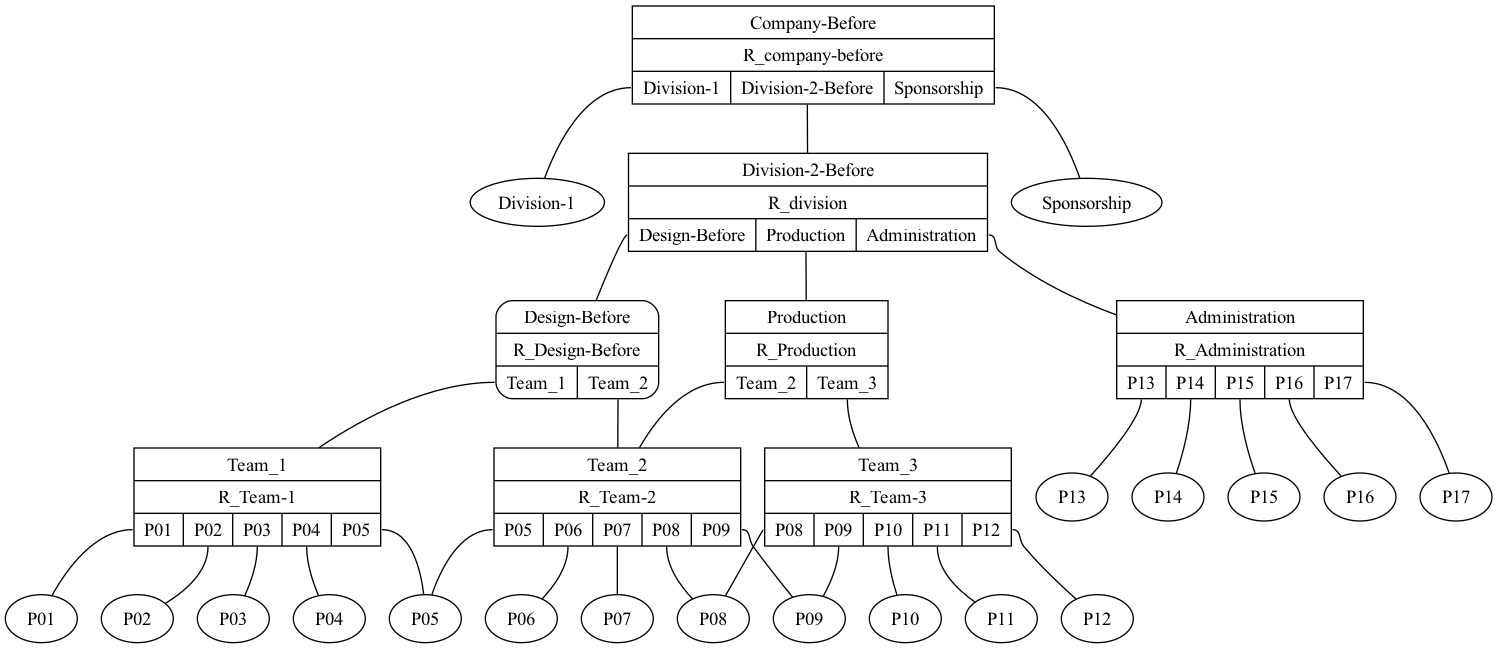

In [2]:
hn_before = Hypernetwork()

compile_hn(hn_before, parser, """
    Company-Before=<Division-1, Division-2-Before, Sponsorship; R_company-before>
    Division-2-Before=<Design-Before, Production, Administration; R_division>
    Design-Before={Team_1, Team_2; R_Design-Before}
    Production=<Team_2, Team_3; R_Production>

    Team_1 = <P01, P02, P03, P04, P05; R_Team-1>
    Team_2=<P05, P06, P07, P08, P09; R_Team-2>
    Team_3=<P08, P09, P10, P11, P12; R_Team-3>
    Administration=<P13, P14, P15, P16, P17; R_Administration>
""")

draw_hn(hn_before, fname=pictures_dir+"before-company-hn", view=False, show_hstype=False)
Image(filename=pictures_dir+"before-company-hn.png", width=1000, height=1200)

In [3]:
hn_after = Hypernetwork()

compile_hn(hn_after, parser, """
    Company-After=<Division-1, Division-2-After; R_company-after>
    Division-2-After=<Design-After, Production, Administration; R_division>
    Design-After={Supplier, Team_2; R_Design-after}
    Production=<Team_2, Team_3; R_Production>
    
    Team_2=<P05, P06, P07, P08, P09; R_Team-2>
    Team_3=<P08, P09, P10, P11, P12; R_Team-3>
    Administration=<P13, P14, P15, P16, P17; R_Administration>
""")

draw_hn(hn_after, fname=pictures_dir+"after-company-hn", view=False, show_hstype=False)
Image(filename=pictures_dir+"after-company-hn.png", width=1000, height=1200)

KeyError: 'Supplier'

In [ ]:
hn_before_and_after = Hypernetwork()

hn_before_and_after.merge(hn_before)
hn_before_and_after.merge(hn_after)

# print(hn_before_and_after)

draw_hn(hn_before_and_after, fname=pictures_dir+"before-and-after-company-hn", view=False, show_hstype=False, fiddle_order=True)
Image(filename=pictures_dir+"before-and-after-company-hn.png", width=1400, height=1200)

In [ ]:
hn_intersection = Hypernetwork()

hn_intersection.copy(hn_before)
hn_intersection.meet(hn_after)

draw_hn(hn_intersection, fname=pictures_dir+"intersection-company-hn", view=False, show_hstype=False)
Image(filename=pictures_dir+"intersection-company-hn.png", width=1000, height=1200)

In [ ]:
hn = hn_after.difference(hn_before)

draw_hn(hn, fname=pictures_dir+"after-difference-company-hn", view=False, show_hstype=False)
Image(filename=pictures_dir+"after-difference-company-hn.png", width=500)

In [ ]:
hn = hn_before.difference(hn_after)

draw_hn(hn, fname=pictures_dir+"minus-company-hn", view=False, show_hstype=False)
Image(filename=pictures_dir+"minus-company-hn.png", width=600)

In [ ]:
hn = Hypernetwork()
hn1 = Hypernetwork()
hn2 = Hypernetwork()

try:
    compile_hn(hn1, parser, """
        a=<x1, x2, x3; R_A>
        b={y1, y2, y3; R_B}
    """)
    
    compile_hn(hn2, parser, """
        a=<x1, x3, x4; R_C>
        b={y1, y2, y4; R_D}
    """)

    hn.copy(hn1)
    hn.merge(hn2)
    
except HnRMismatch as err:
    print(f"FAIL: Mismatch R_{err}")

draw_hn(hn, fname=pictures_dir+"merge-hn", view=False, show_hstype=False)
Image(filename=pictures_dir+"merge-hn.png", width=700, height=1200)

In [ ]:
hn = Hypernetwork()
hn1 = Hypernetwork()
hn2 = Hypernetwork()

try:
    compile_hn(hn1, parser, """
        a=<x1, x2, x3; R_A>
        b={y1, y2, y3; R_B}
    """)
    
    compile_hn(hn2, parser, """
        a={x1, x3, x4; R_A}
        b={y1, y2, y4; R_D}
    """)

    hn.copy(hn1)
    hn.merge(hn2)

except HnRMismatch as err:
    print(f"FAIL: Mismatch R_{err}")

draw_hn(hn, fname=pictures_dir+"merge2-hn", view=False, show_hstype=False)
Image(filename=pictures_dir+"merge2-hn.png", width=700, height=1200)

In [ ]:
hn = Hypernetwork()
hn1 = Hypernetwork()
hn2 = Hypernetwork()

try:
    compile_hn(hn1, parser, """
        a=<x1, x2, x3; R_A>
        b={y1, y2, y3; R_B}
    """)
    
    compile_hn(hn2, parser, """
        a={x1, x3, x4; R_A}
        b={y1, y2, y4; R_D}
    """)

    hn.copy(hn1)
    hn.merge(hn2)

except HnRMismatch as err:
    print(f"FAIL: Mismatch R_{err}")

draw_hn(hn, fname=pictures_dir+"merge2-hn", view=False, show_hstype=False)
Image(filename=pictures_dir+"merge2-hn.png", width=700, height=1200)

In [ ]:
hn = Hypernetwork()
hn1 = Hypernetwork()
hn2 = Hypernetwork()

try:
    compile_hn(hn1, parser, """
        a=<x1, x2, x3; R_A>
        b={y1, y2, y3; R_B}
    """)
    
    compile_hn(hn2, parser, """
        a=<x1, x3, x4; R_C>
        b={y1, y2, y4; R_B}
    """)
    
    hn.copy(hn1)
    hn.meet(hn2)

except HnRMismatch as err:
    print(f"FAIL: Mismatch R_{err}")

else:
    draw_hn(hn, fname=pictures_dir+"meet-hn", view=False, show_hstype=False)

Image(filename=pictures_dir+"meet-hn.png", width=500, height=1200)

### type!=, n=, sigma=, R=

In [ ]:
hn = Hypernetwork()

try:
    compile_hn(hn, parser, """
        a={x1, x2, x3; R_A}
        a=<x1, x2, x3; R_A>
    """)
    
except HnRMismatch as err:
    print(f"FAIL: Mismatch R_{err}")

draw_hn(hn, fname=pictures_dir+"merge2-hn", view=False, show_hstype=False)
Image(filename=pictures_dir+"merge2-hn.png", width=300, height=1200)

### type!=, n=, sigma!=, R=

In [ ]:
hn = Hypernetwork()

try:
    compile_hn(hn, parser, """
        a={x1, x2, x3; R_A}
        a=<x1, x2; R_A>
    """)    
    
except HnRMismatch as err:
    print(f"FAIL: Mismatch R_{err}")

draw_hn(hn, fname=pictures_dir+"merge3-hn", view=False, show_hstype=False)
Image(filename=pictures_dir+"merge3-hn.png", width=300, height=1200)

### type!=, n=, sigma=, R!=

In [ ]:
hn = Hypernetwork()

try:
    compile_hn(hn, parser, """
        a={x1, x2, x3; R_A}
        a=<x1, x2, x3; R_B>
    """)
    
except HnRMismatch as err:
    print(f"FAIL: Mismatch R_{err}")

draw_hn(hn, fname=pictures_dir+"merge4-hn", view=False, show_hstype=False)
Image(filename=pictures_dir+"merge4-hn.png", width=300, height=1200)

### type!=, n=, sigma!=, R!=

In [ ]:
hn = Hypernetwork()

try:
    compile_hn(hn, parser, """
        a={x1, x2, x3; R_A}
        a=<x1, x2; R_B>
    """)
    
except HnRMismatch as err:
    print(f"FAIL: Mismatch R_{err}")

draw_hn(hn, fname=pictures_dir+"merge5-hn", view=False, show_hstype=False)
Image(filename=pictures_dir+"merge5-hn.png", width=300, height=1200)